### L2 and L1 regularization for linear estimators

In [4]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Ex. 1 Split train-test dataset

In [7]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
random_state = 10
X_train, X_test, y_train, y_test = train_test_split(bos, boston.target, test_size=0.2, shuffle=True, random_state=random_state)

In [10]:
print(bos.shape[0])
print(float(X_train.shape[0]) / float(bos.shape[0]))
print(float(X_test.shape[0]) / float(bos.shape[0]))

506
0.7984189723320159
0.2015810276679842


#### Ex. 2 Linear regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
Y_pred = regr.predict(X_test)

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = [10, 10])
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.plot()

[]

#### How should an ideal scatter look like?
Ideal scatter should be a shape of y = x

#### Ex. 3: To check the level of error of a model calculate the Mean Squared Error.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'% mean_squared_error(y_test, Y_pred))

Mean squared error: 34.41


#### Ex. 4: Calculate the `model.score`. Check what it is for linear problems.

In [16]:
regr.score(X_test, y_test)

0.670933983911564

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
bos = scaler.fit_transform(bos)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features= PolynomialFeatures(degree=2)
bos = polynomial_features.fit_transform(bos)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(bos, boston.target, test_size=0.2, shuffle=True, random_state=random_state)

In [21]:
regr = LinearRegression()
regr.fit(X_train, y_train)
Y_pred = regr.predict(X_test)

In [22]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, Y_pred))
print("Model score", regr.score(X_test, y_test))

Mean squared error: 13.52
Model score 0.8707117707531369


In [23]:
from sklearn.linear_model import Ridge, Lasso

#### Ex. 5: Lasso

In [24]:
alpha = 1.0 

In [25]:
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print("Test score", lasso_reg.score(X_test, y_test))

Test score 0.7414094991644817


In [26]:
print("Train score", lasso_reg.score(X_train, y_train))

Train score 0.760921936201074


In [27]:
alphas = [2**i for i in range(-20, 20, 2)]
lasso_test_scores = []
lasso_train_scores = []

In [28]:
for a in alphas:
    lasso_reg = Lasso(alpha=a)
    lasso_reg.fit(X_train, y_train)
    lasso_test_scores.append(lasso_reg.score(X_test, y_test))
    lasso_train_scores.append(lasso_reg.score(X_train, y_train))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1087.8545249983083, tolerance: 3.1092183044554456
  positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1086.691694887067, tolerance: 3.1092183044554456
  positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1082.267284398965, tolerance: 3.1092183044554456
  positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1067.7071338522892, tolerance: 3.10921830445

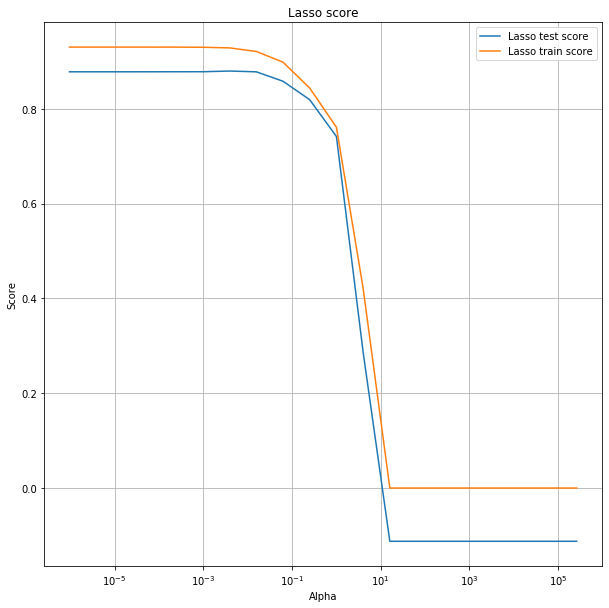

In [29]:
plt.figure(figsize = [10, 10])
plt.semilogx(alphas, lasso_test_scores, label = 'Lasso test score')
plt.semilogx(alphas, lasso_train_scores, label = 'Lasso train score')
plt.title('Lasso score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()

#### Ex. 6: Ridge

In [30]:
alpha = 1.0 

In [31]:
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
print("Test score", ridge_reg.score(X_test, y_test))

Test score 0.8766526802673361


In [32]:
print("Train score", ridge_reg.score(X_train, y_train))

Train score 0.9280459970167851


In [33]:
alphas = [2**i for i in range(-20, 20, 2)]
ridge_test_scores = []
ridge_train_scores = []

In [34]:
for a in alphas:
    ridge_reg = Ridge(alpha=a)
    ridge_reg.fit(X_train, y_train)
    ridge_test_scores.append(ridge_reg.score(X_test, y_test))
    ridge_train_scores.append(ridge_reg.score(X_train, y_train))

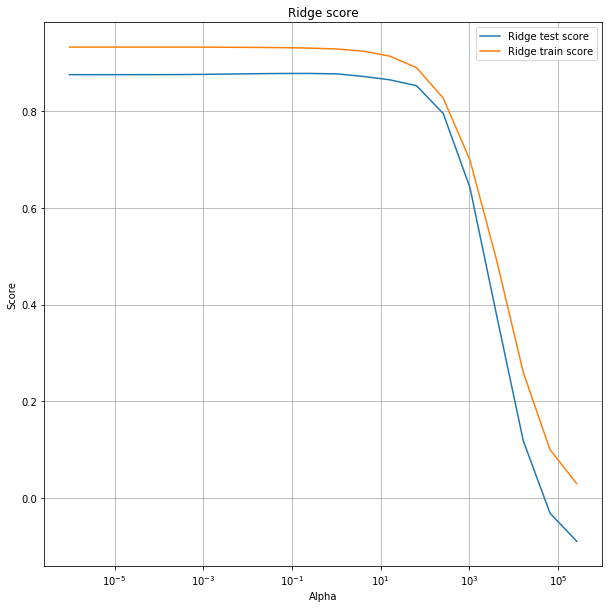

In [35]:
plt.figure(figsize = [10, 10])
plt.semilogx(alphas, ridge_test_scores, label = 'Ridge test score')
plt.semilogx(alphas, ridge_train_scores, label = 'Ridge train score')
plt.title('Ridge score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()

### Regularization for logistic regression

In [36]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data)

#### Ex. 1

In [37]:
df.isnull()

0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
564  False  False  False  False  False  False  False  False  False  False   
565  False  False  False  False  False  False  False  False  False  False   
566  False  False  False  False  False  False  False  False  False  False   
567  False  False  False  False  False  False  False  False  False  False   
568  False  False  False  False  False  False  False  False  False  False   

     ...     20     21     22     23     24     25     26     27     28     29  
0    ...  False  False  False  False  False  False  False  False  False  False  
1    ...  False  False  False  False  False  False  False  False  False  False  
2    ...  False  False  False  False  False  False  False  False  False  False  
3    ...  False  False  False  False  False  False  False  False  False  False  
4    ...  False  False  False  False  False  False  False  False  False  False  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
564  ...  False  False  False  False  False  False  False  False  False  False  
565  ...  False  False  False  False  False  False  False  False  False  False  
566  ...  False  False  False  False  False  False  False  False  False  False  
567  ...  False  False  False  False  False  False  False  False  False  False  
568  ...  False  False  False  False  False  False  False  False  False  False  

[569 rows x 30 columns]

In [38]:
df.fillna(df.mean())

0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          9   ...      20     21      22      23       24       25      26  \
0    0.07871  ...  25.380  17.33  184.60  2019.0  0.16220  0.66560  0.7119   
1    0.05667  ...  24.990  23.41  158.80  1956.0  0.12380  0.18660  0.2416   
2    0.05999  ...  23.570  25.53  152.50  1709.0  0.14440  0.42450  0.4504   
3    0.09744  ...  14.910  26.50   98.87   567.7  0.20980  0.86630  0.6869   
4    0.05883  ...  22.540  16.67  152.20  1575.0  0.13740  0.20500  0.4000   
..       ...  ...     ...    ...     ...     ...      ...      ...     ...   
564  0.05623  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130  0.4107   
565  0.05533  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220  0.3215   
566  0.05648  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940  0.3403   
567  0.07016  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810  0.9387   
568  0.05884  ...   9.456  30.37   59.16   268.6  0.08996  0.06444  0.0000   

         27      28       29  
0    0.2654  0.4601  0.11890  
1    0.1860  0.2750  0.08902  
2    0.2430  0.3613  0.08758  
3    0.2575  0.6638  0.17300  
4    0.1625  0.2364  0.07678  
..      ...     ...      ...  
564  0.2216  0.2060  0.07115  
565  0.1628  0.2572  0.06637  
566  0.1418  0.2218  0.07820  
567  0.2650  0.4087  0.12400  
568  0.0000  0.2871  0.07039  

[569 rows x 30 columns]

#### Ex. 2

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size = 0.2, random_state = 5)

In [40]:
df.drop(0, axis = 1, inplace = True)

#### Ex. 3

In [41]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(penalty = 'l1', C = 1)

#### Ex. 4

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages

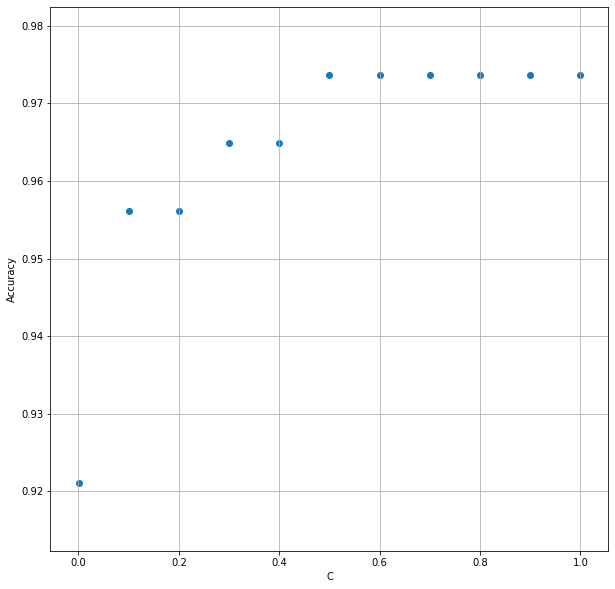

In [42]:
import matplotlib.pyplot as plt
c_list = [0.0001 + 0.1*i for i in range(10)]
c_list.append(1)
accuracy_list = []
for c in c_list:
    reg = LogisticRegression(penalty = 'l2', C = c).fit(X_train, y_train)
    accuracy_list.append(reg.score(X_test, y_test))
plt.figure(figsize = [10, 10])
plt.scatter(c_list, accuracy_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

### Regularization for kNN method

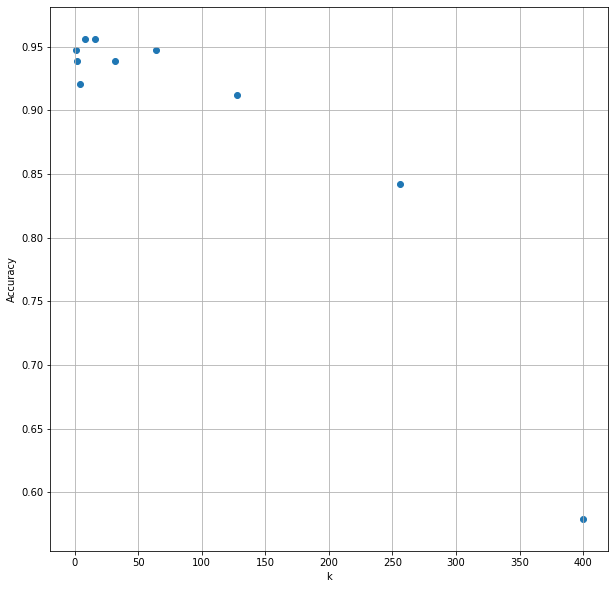

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k_list = [2**i for i in range(9)]
k_list.append(400)
accuracy_list = []
best_accuracy = 0
best_k = k_list[0]
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X = X_train, y = y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    if accuracy_score(y_test, y_pred) > best_accuracy:
        best_accuracy = accuracy_score(y_test, y_pred)
        best_k = k

plt.figure(figsize = [10, 10])
plt.scatter(k_list, accuracy_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [44]:
print("Optimal value for k = {}".format(best_k))

Optimal value for k = 8


### Decision trees optimization

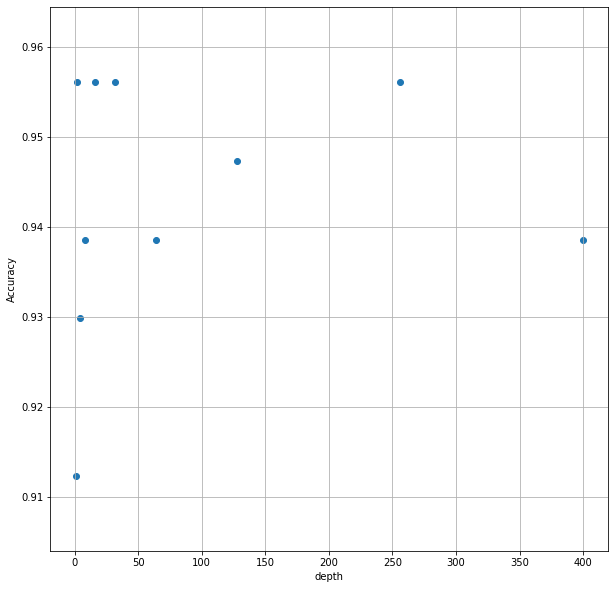

In [45]:
from sklearn.tree import DecisionTreeClassifier

depth_list = [2**i for i in range(9)]
depth_list.append(400)
accuracy_list = []
best_accuracy = 0
best_depth = depth_list[0]
for d in depth_list:
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    if accuracy_score(y_test, y_pred) > best_accuracy:
        best_accuracy = accuracy_score(y_test, y_pred)
        best_depth = d

plt.figure(figsize = [10, 10])
plt.scatter(depth_list, accuracy_list)
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [46]:
print("Optimal tree depth = {}".format(best_depth))

Optimal tree depth = 2
